In [300]:
import os
os.chdir('R:\\JoePriceResearch\\RA_work_folders\\Isaac_Riley')

In [621]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
pd.set_option('precision',3)
import numpy as np
import pandas as pd
import re as re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [622]:
df = pd.read_csv('clean.csv').fillna(0)

In [623]:
df.shape

(19893, 1509)

In [624]:
df = df.drop_duplicates()

In [625]:
cols0 = list(df.columns.values)
hiv = [c for c in cols0 if 'HIV' in c or 'hiv' in c]
print(hiv)

['PFHIV', 'SLESHIV1', 'SSPECHIV', 'SLESHIV2', 'XRESHIVP', 'XRESHIVB', 'YRESHIVP', 'YRESHIVB', 'zphclsbt_A person living with HIV giving a talk']


In [626]:
df = df.drop(hiv, axis = 1)
cols = df.columns.values

In [627]:
#dists = [c for c in cols if 'DISTRICT' in c]
#df = df.drop(dists, axis=1)

In [628]:
[c for c in combined if c in hiv]

[]

In [629]:
Plist = [c for c in cols if c[0]=='P' or c[:2] in ['zp', 'ZP']]
Slist = [c for c in cols if c[0]=='S' or c[:2]=='zs' or c in ['enr6', 'difenr', 'difenr2', 'numstu', 'xnumstu']]
Tlist = [c for c in cols if c[0] in ['T', 'X', 'Y'] or c[:2] in ['zx', 'zy', 'zt']]
IDlist = list(cols[:8])+([c for c in cols if 'REGION' in c or 'stratum' in c or 'COUNTRY' in c or 'DISTRICT' in c or c in ['strsize', 'PFCLASS', 'SFCLASS', 'zstype']])
combined = Plist+Slist+Tlist+IDlist
other = [c for c in cols if c not in combined and c not in dists and 'REGION' not in c]

In [630]:
print(len(Plist))
print(len(Slist))
print(len(Tlist))
print(len(IDlist))
print(len(combined))
print(len(other))

584
355
275
265
1479
27


In [631]:
print(other)

['prob1', 'RF1', 'pweight1', 'RF2', 'pweight2', 'achieved', 'pweighta', 'yclass', 'yclsize', 'zralocp', 'zmalocp', 'zraloct', 'zmaloct', 'ZHAMINP', 'ZHADESP', 'ZHAMINRT', 'ZHADESRT', 'ZHAMINMT', 'ZHADESMT', 'ZHAMINHT', 'ZHADESHT', 'ZRALEVP', 'ZMALEVP', 'ZRALEVT', 'ZMALEVT', 'sresloc', 'ZSRESLEV']


In [632]:
df[other[:10]].describe()

,prob1,RF1,pweight1,RF2,pweight2,achieved,pweighta,yclass,yclsize,zralocp
count,1.989e+04,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000
mean,7.672e-02,55.068,0.991,57.119,0.993,3834.389,0.106,1.591,42.479,512.848
std,8.603e-02,66.669,0.330,78.216,0.415,547.732,0.046,1.045,21.199,103.742
min,7.800e-04,1.000,0.083,1.000,0.045,2781.000,0.004,0.000,0.000,0.000
25%,1.200e-02,8.300,0.790,7.900,0.720,3524.000,0.075,1.000,29.000,437.000
50%,6.900e-02,14.000,1.000,13.000,0.980,3868.000,0.110,1.000,37.000,490.000
75%,1.200e-01,84.000,1.200,84.000,1.200,4240.000,0.130,2.000,51.000,578.000
max,1.000e+00,1275.000,8.300,606.000,3.600,4436.000,0.320,13.000,200.000,966.000


In [633]:
df[other[10:20]].describe()

,zmalocp,zraloct,zmaloct,ZHAMINP,ZHADESP,ZHAMINRT,ZHADESRT,ZHAMINMT,ZHADESMT,ZHAMINHT
count,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000
mean,525.574,593.306,623.494,0.304,0.060,0.963,0.798,0.953,0.794,0.958
std,108.621,311.284,340.432,0.460,0.238,0.189,0.401,0.213,0.404,0.201
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,454.000,646.000,643.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
50%,509.000,728.000,749.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
75%,573.000,782.000,833.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
max,1090.000,959.000,1204.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [634]:
df[other[20:]].describe()

,ZHADESHT,ZRALEVP,ZMALEVP,ZRALEVT,ZMALEVT,sresloc,ZSRESLEV
count,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000,19893.000
mean,0.803,4.370,3.531,6.127,5.565,0.024,3.542
std,0.398,1.853,1.553,3.188,3.038,1.041,1.087
min,0.000,0.000,0.000,0.000,0.000,-3.030,0.000
25%,1.000,3.000,2.000,7.000,5.000,-0.720,3.000
50%,1.000,4.000,3.000,8.000,7.000,-0.075,3.000
75%,1.000,6.000,4.000,8.000,8.000,0.781,4.000
max,1.000,8.000,8.000,8.000,8.000,2.800,6.000


In [635]:
print(Plist)

['PUPIL', 'PCLASS', 'PBDAY', 'PBMONTH', 'PBYEAR', 'PSEX', 'PNURSERY', 'PENGLISH', 'PMALIVE', 'PFALIVE', 'PBRO', 'PSIS', 'PSTAY1', 'PSTAY2', 'PSTAY3', 'PSTAY4', 'PSTAY5', 'PSTAY6', 'PSTAY7', 'PSTAY8', 'PSTAY9', 'PTRAVEL', 'PBOOKSHM', 'PTASK1', 'PTASK2', 'PTASK3', 'PTASK4', 'PTASK5', 'PTASK6', 'PTASK7', 'PTASK8', 'PTASK9', 'PTASK10', 'PTASK11', 'PTASK12', 'PTASK13', 'PTASK14', 'PPOS01', 'PPOS02', 'PPOS03', 'PPOS04', 'PPOS05', 'PPOS06', 'PPOS07', 'PPOS08', 'PPOS09', 'PPOS10', 'PPOS11', 'PPOS12', 'PPOS13', 'PPOS14', 'PPOS15', 'PPOS16', 'PPOS17', 'PPOS18', 'PPOS19', 'PPOS20', 'PPOS21', 'PPOS22', 'PPOS23', 'PPOS24', 'PPOS25', 'PPOS26', 'PPOS27', 'PPOS28', 'PPOS29', 'PPOS30', 'PPOS31', 'PMOTHER', 'PFATHER', 'PABSENT', 'PABWHY1', 'PABWHY2', 'PABWHY3', 'PABWHY4', 'PABWHY5', 'PABWHY6', 'PREPEAT', 'PREPEAT6', 'PRPTWHY1', 'PRPTWHY2', 'PRPTWHY3', 'PRPTWHY4', 'PBORROWC', 'PBORROWS', 'PBORROWO', 'PBORROW1', 'PBORROW2', 'PBORROW3', 'PMAT01', 'PMAT02', 'PMAT03', 'PMAT04', 'PMAT05', 'PMAT06', 'PMAT07', 

In [636]:
print(Slist)

['SCHOOL', 'enr6', 'difenr', 'difenr2', 'numstu', 'xnumstu', 'SSEX', 'SAGE', 'SQACADEM', 'SQTT', 'SEXPTCH', 'SEXPALL', 'SQSPEC', 'SQSPECDY', 'SQHLTH', 'SQHLTHDY', 'SPERIODS', 'SMINUTES', 'SACTHD01', 'SACTHD02', 'SACTHD03', 'SACTHD04', 'SACTHD05', 'SACTHD06', 'SPUPPR01', 'SPUPPR02', 'SPUPPR03', 'SPUPPR04', 'SPUPPR05', 'SPUPPR06', 'SPUPPR07', 'SPUPPR08', 'SPUPPR09', 'SPUPPR10', 'SPUPPR11', 'SPUPPR12', 'SPUPPR13', 'SPUPPR14', 'SPUPPR15', 'SPUPPR16', 'SPUPPR17', 'SPUPPR18', 'STCHPR01', 'STCHPR02', 'STCHPR03', 'STCHPR04', 'STCHPR05', 'STCHPR06', 'STCHPR07', 'STCHPR08', 'STCHPR09', 'STCHPR10', 'SMSURE01', 'SMSURE02', 'SMSURE03', 'SMSURE04', 'SMSURE05', 'SMSURE06', 'SMSURE07', 'SMSURE08', 'SMSURE09', 'SMSURE10', 'SMSURE11', 'SCONDIT', 'SRES01', 'SRES02', 'SRES03', 'SRES04', 'SRES05', 'SRES06', 'SRES07', 'SRES08', 'SRES09', 'SRES10', 'SRES11', 'SRES12', 'SRES13', 'SRES14', 'SRES15', 'SRES16', 'SRES17', 'SRES18', 'SRES19', 'SRES20', 'SRES21', 'SRES22', 'SRES23', 'SRES24', 'SRES25', 'SRES26', 'S

In [637]:
print(Tlist)

['XSEX', 'XAGE', 'XQACADEM', 'XQPROFES', 'XNUMYRS', 'XINSERVC', 'XINSERVD', 'XINSERVE', 'XBORROW', 'XBOOKCLS', 'XRESCKBD', 'XRESCHLK', 'XRESDSTR', 'XRESWCHT', 'XRESCPBD', 'XRESBKSH', 'XRESCLIB', 'XRESTTAB', 'XRESTCHR', 'XSITCLAS', 'XWRITCLS', 'XRESMAP', 'XRESENGD', 'XRESCGEO', 'XRESTGR', 'XRESTGM', 'XRESTGH', 'XRESBOOK', 'XRESRAD', 'XRESTV', 'XRESCAS', 'XRESCD', 'XRESVCR', 'XRESDVD', 'XRESCOMP', 'XRESINT', 'XRESPCPY', 'XNPERIOD', 'XMINPER', 'XHRSPREP', 'XMEETPAR', 'XTEACHMA', 'XTEACHSC', 'XTEACHSS', 'XTEACHHS', 'XTRAINRD', 'XTRAINMA', 'XTRAINSC', 'XTRAINSS', 'XTRAINHS', 'XABSNT1', 'XABSNT2', 'XABSNT3', 'XABSNT4', 'XABSNT5', 'XABSNT6', 'XABSNT7', 'XABSNT8', 'XABSNT9', 'XABSNT10', 'XABSNT11', 'XABSNT12', 'XPRINADV', 'XRCENTRE', 'XRCUSE1', 'XRCUSE2', 'XRCUSE3', 'XRCUSE4', 'XRCUSE5', 'XRCUSE6', 'XCONDLIV', 'XRRPTCOM', 'XRPTMCOM', 'XRPTHCOM', 'XSIGNHM', 'XTEST', 'YSEX', 'YAGE', 'YQACADEM', 'YQPROFES', 'YNUMYRS', 'YINSERVC', 'YINSERVD', 'YINSERVE', 'YBORROW', 'YBOOKCLS', 'YRESCKBD', 'YRESCHL

In [638]:
relevant = Slist+Plist+Tlist+['COUNTRY', 'zmalocp', 'zralocp']
country = df['COUNTRY']

In [639]:
df_original = 1*df


In [640]:
df_id = df_original[IDlist]


In [641]:
df_other = df_original[other]


In [642]:
print(relevant)
print([c for c in relevant if c in hiv])

['SCHOOL', 'enr6', 'difenr', 'difenr2', 'numstu', 'xnumstu', 'SSEX', 'SAGE', 'SQACADEM', 'SQTT', 'SEXPTCH', 'SEXPALL', 'SQSPEC', 'SQSPECDY', 'SQHLTH', 'SQHLTHDY', 'SPERIODS', 'SMINUTES', 'SACTHD01', 'SACTHD02', 'SACTHD03', 'SACTHD04', 'SACTHD05', 'SACTHD06', 'SPUPPR01', 'SPUPPR02', 'SPUPPR03', 'SPUPPR04', 'SPUPPR05', 'SPUPPR06', 'SPUPPR07', 'SPUPPR08', 'SPUPPR09', 'SPUPPR10', 'SPUPPR11', 'SPUPPR12', 'SPUPPR13', 'SPUPPR14', 'SPUPPR15', 'SPUPPR16', 'SPUPPR17', 'SPUPPR18', 'STCHPR01', 'STCHPR02', 'STCHPR03', 'STCHPR04', 'STCHPR05', 'STCHPR06', 'STCHPR07', 'STCHPR08', 'STCHPR09', 'STCHPR10', 'SMSURE01', 'SMSURE02', 'SMSURE03', 'SMSURE04', 'SMSURE05', 'SMSURE06', 'SMSURE07', 'SMSURE08', 'SMSURE09', 'SMSURE10', 'SMSURE11', 'SCONDIT', 'SRES01', 'SRES02', 'SRES03', 'SRES04', 'SRES05', 'SRES06', 'SRES07', 'SRES08', 'SRES09', 'SRES10', 'SRES11', 'SRES12', 'SRES13', 'SRES14', 'SRES15', 'SRES16', 'SRES17', 'SRES18', 'SRES19', 'SRES20', 'SRES21', 'SRES22', 'SRES23', 'SRES24', 'SRES25', 'SRES26', 'S

In [643]:
df = df_original[relevant]

In [644]:
df_rel.shape

(19893, 1215)

In [645]:
df.shape

(19893, 1217)

In [646]:
df.replace(np.inf, 0)

,SCHOOL,enr6,difenr,difenr2,numstu,xnumstu,SSEX,SAGE,SQACADEM,SQTT,...,YQPERMNT_PERMANENT GOVT,YQPERMNT_PERMANET NOT-GOVT,YQPERMNT_TEMPORARY GOVT,YQPERMNT_TEMPORARY NON-GOVT,YRCVISIT_NO EDUC RES CENTRE,YRCVISIT_NOT VISITED,YRCVISIT_VISITED,COUNTRY,zmalocp,zralocp
0,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,535.0,482.0
1,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,509.0,490.0
2,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,483.0,473.0
3,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,623.0,437.0
4,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,483.0,525.0
5,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,548.0,578.0
6,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,469.0,490.0
7,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,636.0,608.0
8,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,610.0,629.0
9,85,15,5,5,15,15,0,50,2,2.0,...,1,0,0,0,0,1,0,BOT,535.0,551.0


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19893 entries, 0 to 19892
Columns: 1217 entries, SCHOOL to zralocp
dtypes: float64(717), int64(496), object(4)
memory usage: 184.9+ MB


In [648]:
df[obj].head()

,COUNTRY
0,BOT
1,BOT
2,BOT
3,BOT
4,BOT


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19893 entries, 0 to 19892
Columns: 1217 entries, SCHOOL to zralocp
dtypes: float64(717), int64(496), object(4)
memory usage: 184.9+ MB


In [650]:
cols = list(df.columns.values)
obj = [c for c in df.columns.values if df[c].dtype==object]

In [651]:
obj

['SFCLASS', 'zstype', 'PFCLASS', 'COUNTRY']

In [652]:
df = df.drop(['SFCLASS', 'zstype', 'PFCLASS'], axis=1)

In [705]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [8]:
#print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

In [ ]:
#print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

In [ ]:
#for dataset in full_data:
#    dataset['FamSize'] = 1 + dataset['SibSp'] + dataset['Parch'] 
#print (train[['FamSize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

In [654]:
knn = KNeighborsClassifier(3)
svc = SVC(probability=True),
tree = DecisionTreeClassifier(),
rf = RandomForestClassifier(),
ada = AdaBoostClassifier(),
gb = GradientBoostingClassifier(),
gnb = GaussianNB(),
lda = LinearDiscriminantAnalysis(),
qda = QuadraticDiscriminantAnalysis(),
lr = LogisticRegression()

In [655]:
classifiers = [knn,
svc,
tree,
rf,
ada,
gb,
gnb,
lda,
qda,
lr]

In [656]:
kenya = df[df['COUNTRY']=='KEN'].drop('COUNTRY', axis=1)
botswana = df[df['COUNTRY']=='BOT'].drop('COUNTRY', axis=1)
lesotho = df[df['COUNTRY']=='LES'].drop('COUNTRY', axis=1)
malawi = df[df['COUNTRY']=='MAL'].drop('COUNTRY', axis=1)
mauritius = df[df['COUNTRY']=='MAU'].drop('COUNTRY', axis=1)
mozambique = df[df['COUNTRY']=='MOZ'].drop('COUNTRY', axis=1)

In [657]:
print(kenya.shape)
print(botswana.shape)
print(lesotho.shape)
print(malawi.shape)
print(mauritius.shape)
print(mozambique.shape)

(4436, 1213)
(3868, 1213)
(4240, 1213)
(2781, 1213)
(3524, 1213)
(1044, 1213)


In [658]:
df2 = pd.DataFrame({'Kenya': np.zeros(6),
                    'Botswana': np.zeros(6),
                    'Lesotho': np.zeros(6),
                    'Malawi': np.zeros(6),
                    'Mauritius': np.zeros(6),
                    'Mozambique': np.zeros(6)})

In [659]:
np.mean(df['STYPE'])

0.2979942693409742

In [660]:
df2

,Botswana,Kenya,Lesotho,Malawi,Mauritius,Mozambique
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [711]:
df2dict = {'Botswana':0, 'Kenya':1, 'Lesotho':2, 'Malawi':3, 'Mauritius':4, 'Mozambique':5}

In [661]:
kenya['STYPE'].describe()

count    4436.000
mean        0.101
std         0.302
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: STYPE, dtype: float64

In [662]:
kenya['STYPE'].shape

(4436,)

Make predictions on school type from a model trained on Kenya:

In [663]:
y_train = kenya['STYPE']

In [667]:
#X_train = kenya.drop('STYPE', axis=1)
#X_train = kenya.drop(obj, axis=1)

In [666]:
#y_test = botswana['STYPE']
#X_test = botswana.drop('STYPE', axis=1)
#X_test = botswana.drop(obj, axis=1)

In [417]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(4436,)
(4436, 1211)
(3868,)
(3868, 1211)


In [684]:
model = LogisticRegression()
#model = RandomForestClassifier()
train = kenya
test = botswana
target = 'STYPE'

In [685]:
X_tr = train.drop(target, axis=1)
X_tr.shape

(4436, 1212)

In [686]:
X_te = test.drop(target, axis=1)
X_te.shape

(3868, 1212)

In [687]:
y_tr = train[target]
y_tr.shape

(4436,)

In [688]:
y_te = test[target]
y_te.shape

(3868,)

In [689]:
model.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [690]:
preds = model.predict(X_te)

In [691]:
accuracy_score(y_te, preds)

0.09488107549120993

In [707]:
def pcorrect(model, train, test, target):
    X_tr = train.drop(target, axis=1)
    X_te = test.drop(target, axis=1)
    y_tr = train[target]
    #print(y_tr.dtype)
    y_te = test[target]
    #print(y_te.dtype)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return mean_squared_error(y_te, preds)

In [717]:
countries = [kenya,botswana,lesotho,malawi,mauritius,mozambique]
cdict = dict(zip(df2.columns.values,countries))
print(cdict)

{'Botswana':          SCHOOL  enr6  difenr  difenr2  numstu  xnumstu  SSEX  SAGE  SQACADEM  \
3868     101354    24      21       21      23       23     1    55         4   
3869     101354    24      21       21      23       23     1    55         4   
3870     101354    24      21       21      23       23     1    55         4   
3871     101354    24      21       21      23       23     1    55         4   
3872     101354    24      21       21      23       23     1    55         4   
3873     101354    24      21       21      23       23     1    55         4   
3874     101354    24      21       21      23       23     1    55         4   
3875     101354    24      21       21      23       23     1    55         4   
3876     101354    24      21       21      23       23     1    55         4   
3877     101354    24      21       21      23       23     1    55         4   
3878     101354    24      21       21      23       23     1    55         4   
3879     101354

In [723]:
df2cols = df2.columns.values 
for c in df2cols:
    for d in range(6):
        if c != df2cols[d]:
            print(c, df2cols[d])
            df2[c][d] = pcorrect(SVR(), cdict[c], cdict[df2cols[d]], 'STYPE')
            

Botswana Kenya
int64
int64
Botswana Lesotho
int64
int64
Botswana Malawi
int64
int64
Botswana Mauritius
int64
int64
Botswana Mozambique
int64
int64
Kenya Botswana
int64
int64
Kenya Lesotho
int64
int64
Kenya Malawi
int64
int64
Kenya Mauritius
int64
int64
Kenya Mozambique
int64
int64
Lesotho Botswana
int64
int64
Lesotho Kenya
int64
int64
Lesotho Malawi
int64
int64
Lesotho Mauritius
int64
int64
Lesotho Mozambique
int64
int64
Malawi Botswana
int64
int64
Malawi Kenya
int64
int64
Malawi Lesotho
int64
int64
Malawi Mauritius
int64
int64
Malawi Mozambique
int64
int64
Mauritius Botswana
int64
int64
Mauritius Kenya
int64
int64
Mauritius Lesotho
int64
int64
Mauritius Malawi
int64
int64
Mauritius Mozambique
int64
int64
Mozambique Botswana
int64
int64
Mozambique Kenya
int64
int64
Mozambique Lesotho
int64
int64
Mozambique Malawi
int64
int64
Mozambique Mauritius
int64
int64


In [724]:
df2

,Botswana,Kenya,Lesotho,Malawi,Mauritius,Mozambique
0,0.000,0.097,0.513,0.150,0.123,0.091
1,0.093,0.000,0.516,0.148,0.120,0.086
2,0.551,0.558,0.000,0.371,0.436,0.642
3,0.228,0.230,0.410,0.000,0.213,0.250
4,0.177,0.177,0.450,0.189,0.000,0.187
5,0.043,0.041,0.555,0.124,0.086,0.000


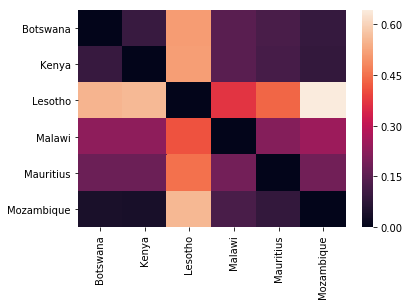

In [729]:
import seaborn as sns
%matplotlib inline

Index= ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
Cols = ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
sns.heatmap(df2, yticklabels=Index)

In [735]:
df3 = df2*1
df3cols = df3.columns.values 

In [ ]:
def pcorrect2(model, train, testlist, target):
    X_tr = train.drop(target, axis=1)
    y_tr = train[target]
    #print(y_tr.dtype)
    #print(y_te.dtype)
    model.fit(X_tr, y_tr)
    mselist = []
    for t in testlist:
        X_te = t.drop(target, axis=1)
        y_te = t[target]
        preds = model.predict(X_te)
        mse = mean_squared_error(y_te, preds)
        print(mse)
        mselist.append(mse)
    return mselist

In [739]:
outmatrix = []
for c in cdict.keys():
    #for d in range(6):
    print(c)
    outlist = pcorrect2(SVR(), cdict[c], countries, 'STYPE')
    outmatrix.append(outlist)

Botswana
Kenya
Lesotho
Malawi
Mauritius
Mozambique


In [741]:
print(outmatrix)

[[0.010005680671793221, 0.09329475814107567, 0.5514396441146575, 0.22845157683763223, 0.17669138354653274, 0.043149184982077655], [0.09654722236583496, 0.009999075606249647, 0.5579316719648871, 0.22976407909608065, 0.1771738450915673, 0.041490127055886436], [0.5125014751922421, 0.5156755504939391, 0.010007075855229482, 0.4095548377882706, 0.4501952483484415, 0.5550482141448534], [0.1504372549403889, 0.14847392799653225, 0.37097926954080734, 0.010000909948630567, 0.18897682388731213, 0.12411993382509087], [0.12310230454867965, 0.12032025995906667, 0.43561149738652927, 0.21333398098541848, 0.009999280527859008, 0.08581052232615215], [0.09111205377888601, 0.0862082643549952, 0.6419584637999678, 0.25015951917985113, 0.18737209401038724, 0.009996637762615558]]


In [756]:
for i in range(6):
    for j in range(5):
        if i > j:    
            print(i,j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
5 4


In [754]:
 df2[df3cols[0]][1]

0.09329475814107567

In [759]:
for i in range(6):
    for j in range(5):
        if i > j:    
            df3[df3cols[j]][i] = outmatrix[i][j]
        if i <= j:
            df3[df3cols[j+1]][i] = outmatrix[i][j]

In [760]:
df3

,Botswana,Kenya,Lesotho,Malawi,Mauritius,Mozambique
0,0.000,0.010,0.093,0.551,0.228,0.177
1,0.097,0.000,0.010,0.558,0.230,0.177
2,0.513,0.516,0.000,0.010,0.410,0.450
3,0.150,0.148,0.371,0.000,0.010,0.189
4,0.123,0.120,0.436,0.213,0.000,0.010
5,0.091,0.086,0.642,0.250,0.187,0.000


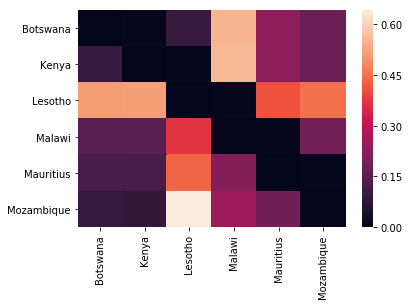

In [761]:
import seaborn as sns
%matplotlib inline

Index= ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
Cols = ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
sns.heatmap(df3, yticklabels=Index)

In [ ]:
knn = KNeighborsClassifier(3)
svc = SVC(probability=True),
tree = DecisionTreeClassifier(),
rf = RandomForestClassifier(),
ada = AdaBoostClassifier(),
gb = GradientBoostingClassifier(),
gnb = GaussianNB(),
lda = LinearDiscriminantAnalysis(),
qda = QuadraticDiscriminantAnalysis(),
lr = LogisticRegression()

In [682]:
from sklearn.linear_model import Lasso as lasso
from sklearn.svm import SVR

In [676]:
def pcorrect(model, train, test, target):
    X_tr = train.drop(target, axis=1)
    y_tr = train[target]#.astype(int)
    X_te = test.drop(target, axis=1)
    #y_tr = LabelBinarizer().fit_transform(y_tr)
    y_te = test[target]#.astype(int)
    #y_te = LabelBinarizer().fit_transform(y_te)
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return accuracy_score(y_test, preds)

In [762]:
outmatrix2 = []
for c in cdict.keys():
    #for d in range(6):
    print(c)
    outlist = pcorrect2(SVR(), cdict[c], countries, 'zmalocp')
    outmatrix2.append(outlist)

Botswana
Kenya
Lesotho
Malawi
Mauritius
Mozambique


In [764]:
df4 = df3*1

In [765]:
for i in range(6):
    for j in range(5):
        if i > j:    
            df4[df3cols[j]][i] = outmatrix2[i][j]
        if i <= j:
            df4[df3cols[j+1]][i] = outmatrix2[i][j]

In [766]:
df4

,Botswana,Kenya,Lesotho,Malawi,Mauritius,Mozambique
0,0.000,8891.259,7407.685,9892.547,14508.614,24021.782
1,10558.382,0.000,6503.269,6530.314,9604.859,28637.554
2,17484.184,9282.254,0.000,4312.798,4637.375,41271.130
3,23831.273,13188.959,5592.217,0.000,4090.042,50880.056
4,11081.039,14484.485,22586.016,30556.231,0.000,19132.622
5,13621.305,7393.412,4730.458,6272.365,34769.737,0.000


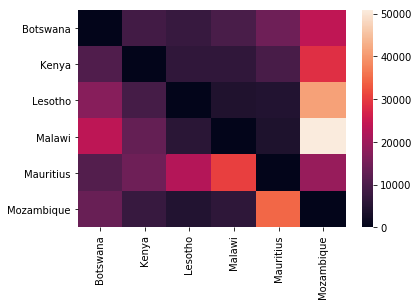

In [767]:
import seaborn as sns
%matplotlib inline

Index= ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
Cols = ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
sns.heatmap(df4, yticklabels=Index)

In [ ]:
outmatrix3 = []
for c in cdict.keys():
    #for d in range(6):
    print(c)
    outlist = pcorrect2(SVR(), cdict[c], countries, 'zralocp')
    outmatrix3.append(outlist)

Botswana
Kenya


In [ ]:
df5 = df3*1

In [ ]:
for i in range(6):
    for j in range(5):
        if i > j:    
            df5[df3cols[j]][i] = outmatrix3[i][j]
        if i <= j:
            df5[df3cols[j+1]][i] = outmatrix3[i][j]

In [ ]:
df5

In [ ]:
import seaborn as sns
%matplotlib inline

Index= ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
Cols = ['Botswana', 'Kenya', 'Lesotho', 'Malawi', 'Mauritius', 'Mozambique']
sns.heatmap(df5, yticklabels=Index)

In [431]:
from sklearn import linear_model
clf = RandomForestClassifier()


In [433]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [435]:
preds = clf.predict(X_test)

In [436]:
preds


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [440]:
accuracy_score(y_test, preds)

0.8782316442605997

In [99]:
acclog_cols = ["Classifier", "Accuracy"]
acclog      = pd.DataFrame(columns=acclog_cols)

In [100]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [101]:
acc_dict = {}
   
clf = GradientBoostingClassifier()


In [102]:
name = clf.__class__.__name__


In [103]:
clf.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [104]:
train_predictions = clf.predict(X_test)


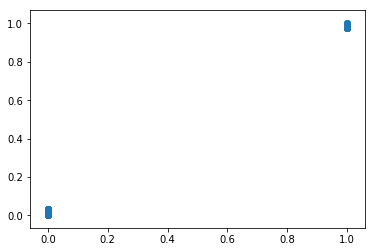

In [424]:
plt.scatter(y_test, preds)

0.8782316442605997

In [ ]:
for k in acc_dict:
    acc_dict[k] = acc_dict[k] / 10.0
    acclog = acclog.append(pd.DataFrame([[k, acc_dict[k]]], columns=acclog_cols))

# Clustering

In [518]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans

In [531]:
Slist2 = ['SCHOOL', 'enr6', 'difenr', 'difenr2', 'numstu', 'xnumstu', 'SSEX', 'SAGE', 'SQACADEM', 'SQTT', 'SEXPTCH', 'SEXPALL', 'SQSPEC', 'SQSPECDY', 'SQHLTH', 'SQHLTHDY', 'SPERIODS', 'SMINUTES', 'SACTHD01', 'SACTHD02', 'SACTHD03', 'SACTHD04', 'SACTHD05', 'SACTHD06', 'SPUPPR01', 'SPUPPR02', 'SPUPPR03', 'SPUPPR04', 'SPUPPR05',
 'SPUPPR06',
 'SPUPPR07',
 'SPUPPR08',
 'SPUPPR09',
 'SPUPPR10',
 'SPUPPR11',
 'SPUPPR12',
 'SPUPPR13',
 'SPUPPR14',
 'SPUPPR15',
 'SPUPPR16',
 'SPUPPR17',
 'SPUPPR18',
 'STCHPR01',
 'STCHPR02',
 'STCHPR03',
 'STCHPR04',
 'STCHPR05',
 'STCHPR06',
 'STCHPR07',
 'STCHPR08',
 'STCHPR09',
 'STCHPR10',
 'SMSURE01',
 'SMSURE02',
 'SMSURE03',
 'SMSURE04',
 'SMSURE05',
 'SMSURE06',
 'SMSURE07',
 'SMSURE08',
 'SMSURE09',
 'SMSURE10',
 'SMSURE11',
 'SCONDIT',
 'SRES01',
 'SRES02',
 'SRES03',
 'SRES04',
 'SRES05',
 'SRES06',
 'SRES07',
 'SRES08',
 'SRES09',
 'SRES10',
 'SRES11',
 'SRES12',
 'SRES13',
 'SRES14',
 'SRES15',
 'SRES16',
 'SRES17',
 'SRES18',
 'SRES19',
 'SRES20',
 'SRES21',
 'SRES22',
 'SRES23',
 'SRES24',
 'SRES25',
 'SRES26',
 'SRES27',
 'SRES28',
 'SRES29',
 'SRES30',
 'SRES31',
 'SRES32',
 'SRES33',
 'SRES34',
 'SRES35',
 'SBORROW',
 'SCOMM01',
 'SCOMM02',
 'SCOMM03',
 'SCOMM04',
 'SCOMM05',
 'SCOMM06',
 'SCOMM07',
 'SCOMM08',
 'SCOMM09',
 'SCOMM10',
 'SCOMM11',
 'SCOMM12',
 'SCOMM13',
 'SCOMM14',
 'SPROBCOM',
 'SFAR1',
 'SFAR2',
 'SFAR3',
 'SFAR4',
 'SFAR5',
 'SFAR6',
 'SFAR7',
 'SFAR8',
 'STCHPM',
 'STCHTM',
 'STCHPF',
 'STCHTF',
 'STCHTOT1',
 'STCHPRIM',
 'STCHJSEC',
 'STCHSSEC',
 'STCHALEV',
 'STCHTERT',
 'STCHTOT2',
 'STCHNOTT',
 'STCHSHOR',
 'STCH1YR',
 'STCH2YR',
 'STCH3YR',
 'STCHMORE',
 'STCHTOT3',
 'STMABS1A',
 'STMABS1O',
 'STMABS1T',
 'STMABS2A',
 'STMABS2O',
 'STMABS2T',
 'STMABS3A',
 'STMABS3O',
 'STMABS3T',
 'STMABS4A',
 'STMABS4O',
 'STMABS4T',
 'STMABS5A',
 'STMABS5O',
 'STMABS5T',
 'STMABSTT',
 'STMNABST',
 'STFABS1A',
 'STFABS1O',
 'STFABS1T',
 'STFABS2A',
 'STFABS2O',
 'STFABS2T',
 'STFABS3A',
 'STFABS3O',
 'STFABS3T',
 'STFABS4A',
 'STFABS4O',
 'STFABS4T',
 'STFABS5A',
 'STFABS5O',
 'STFABS5T',
 'STFABSTT',
 'STFNABST',
 'STCHTOT4',
 'SSPECHLT',
 'SPUPBOY',
 'SPUPGIRL',
 'SPUPBOY6',
 'SPUPGIR6',
 'SCLASS6',
 'SSESS1P',
 'SSESS1C',
 'SSESS2P',
 'SSESS2C',
 'SSESS3P',
 'SSESS3C',
 'SSESS4P',
 'SSESS4C',
 'SSESS5P',
 'SSESS5C',
 'SYRINSP',
 'SINS2006',
 'SSFP',
 'SLOST',
 'SCLRMPER',
 'SCLRMTEM',
 'SCLRMOPE',
 'STOIBOYA',
 'STOIBOYB',
 'STOIGIRA',
 'STOIGIRB',
 'STOISTAA',
 'STOISTAB',
 'SCOMPTR1',
 'SCOMPTR2',
 'SCOMPTR3',
 'SCOMPTR5',
 'SLIBBKS',
 'SFCLSES',
 'SFNBOY5',
 'SFNGIRL5',
 'SFENR5',
 'SFNBOY6',
 'SFNGIRL6',
 'SFENR6',
 'SFNBOY7',
 'SFNGIRL7',
 'SFENR7',
 'SFTMALE5',
 'SFTFMAL5',
 'SFTTOT5',
 'SFTMALE6',
 'SFTFMAL6',
 'SFTTOT6',
 'SFTMALE7',
 'SFTFMAL7',
 'SFTTOT7',
 'SFPUPG6',
 'SFCLAG6',
 'SFRDGTG6',
 'SFMATTG6',
 'SFHLTTG6',
 'SFCLASS',
 'SFSHIFT',
 'SFPUP',
 'SFREAD',
 'SFMATH',
 'SFHLTH',
 'zssex',
 'zstype',
 'zsagelvl',
 'zsqtt',
 'zshrteac',
 'zstchmin',
 'zsptrati',
 'zstchaca',
 'zstchyr',
 'zssessnu',
 'zspupgir',
 'zspupgi6',
 'zspupp01',
 'zspupp02',
 'zspupp03',
 'zspupp04',
 'zspupp05',
 'zspupp06',
 'zspupp07',
 'zspupp08',
 'zspupp09',
 'zspupp10',
 'zspupp11',
 'zspupp12',
 'zspupp13',
 'zspupp14',
 'zspupp15',
 'zspupp16',
 'zspupp17',
 'zspupp18',
 'zstchp01',
 'zstchp02',
 'zstchp03',
 'zstchp04',
 'zstchp05',
 'zstchp06',
 'zstchp07',
 'zstchp08',
 'zstchp09',
 'zstchp10',
 'zsbldgco',
 'zstoitot',
 'zstratio',
 'zsres01',
 'zsres02',
 'zsres03',
 'zsres04',
 'zsres05',
 'zsres06',
 'zsres07',
 'zsres08',
 'zsres09',
 'zsres10',
 'zsres11',
 'zsres12',
 'zsres13',
 'zsres14',
 'zsres15',
 'zsres16',
 'zsres17',
 'zsres18',
 'zsres19',
 'zsres20',
 'zsres21',
 'zsres22',
 'zsres23',
 'zsres24',
 'zsres25',
 'zsres26',
 'zsres27',
 'zsres28',
 'zsres29',
 'zsres30',
 'zsres31',
 'zsres32',
 'zsres33',
 'zsres34',
 'zsres35',
 'zsrtot22',
 'zsborrow',
 'zsdist',
 'zscomm01',
 'zscomm02',
 'zscomm03',
 'zscomm04',
 'zscomm05',
 'zscomm06',
 'zscomm07',
 'zscomm08',
 'zscomm09',
 'zscomm10',
 'zscomm11',
 'zscomm12',
 'zscomm13',
 'zscomm14',
 'zshrisku',
 'zshriskt',
 'zshpupil',
 'zshtcher',
 'zsresloc',
 'SSFP_yn',
 'zslocati_City',
 'zslocati_Isolated/Rural',
 'zslocati_Small town',
 'zsloc_Isolated/Rural',
 'zsloc_Town/City',
 'SLEVELS_PRE- & PRIMARY',
 'SLEVELS_PRE-, PRIMARY & SECONDARY',
 'SLEVELS_PRIMARY & SECONDARY',
 'SLEVELS_PRIMARY ONLY',
 'SLOCAT_ISOLATED',
 'SLOCAT_LARGE CITY',
 'SLOCAT_RURAL',
 'SLOCAT_SMALLTOWN',
 'STYPE']

In [527]:
Slist_2 = [s for s in Slist if s not in ['SFCLASS' 'zstype']]

In [528]:
[s for s in Slist_2 if s in ['SFCLASS' 'zstype']]

[]

In [535]:
Slist2 = [c for c in df.columns.values if c[0]=='S' or c[:2]=='zs']

In [536]:
kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(df[Slist2])
sk_clusters = kmeans.predict(df[Slist2])


In [541]:
sk_clusters

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [543]:
set(sk_clusters)

{0, 1, 2}

In [544]:
np.mean(sk_clusters)

0.2778364248730709

count    19893.000
mean        17.731
std         27.408
min          0.000
25%          2.200
50%          7.200
75%         21.000
max        315.000
Name: zsdist, dtype: float64

[]

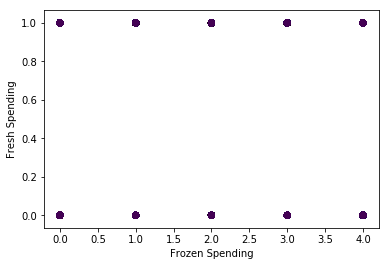

In [540]:
plt.scatter(df['SCONDIT'], df['zsloc_Isolated/Rural'], c=sk_clusters)
plt.xlabel("Frozen Spending")
plt.ylabel("Fresh Spending")
#plt.xlim(0,120000)
#plt.ylim(0,120000)
plt.plot()

In [553]:
df['School_cluster'] = sk_clusters
sreslist = ['zsres01', 'zsres02', 'zsres03', 'zsres04', 'zsres05', 'zsres06', 'zsres07', 'zsres08', 
                             'zsres09', 'zsres10', 'zsres11', 'zsres12', 'zsres13', 'zsres14', 'zsres15', 'zsres16', 
                             'zsres17', 'zsres18', 'zsres19', 'zsres20', 'zsres21', 'zsres22', 'zsres23', 'zsres24', 
                             'zsres25', 'zsres26', 'zsres27', 'zsres28', 'zsres29', 'zsres30', 'zsres31', 'zsres32', 
                             'zsres33', 'zsres34', 'zsres35']
srestotal = df[sreslist].sum(axis=1)
df['SRES_total'] = srestotal

[]

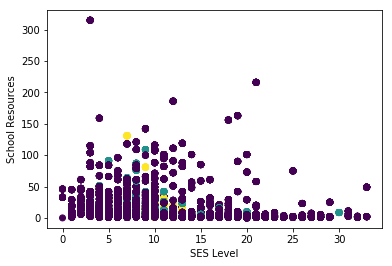

In [560]:
plt.scatter(df['SRES_total'], df['zsdist'], c=sk_clusters)
plt.xlabel("SES Level")
plt.ylabel("School Resources")
#plt.xlim(0,120000)
#plt.ylim(0,120000)
plt.plot()